In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import h5py
#from scipy import signal
from tensorflow.python.keras.models import Model, load_model
import cv2

In [6]:
def patchExtraction(name):
    I = cv2.imread(name)
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    print(I.max())

    m, n= I.shape

    patch = I[m//2-256:m//2+256, n//2-256:n//2+256]/255.
    return patch

In [7]:
discriminator = load_model('net_para/my_model_dis_512.h5')
generator = load_model('net_para/my_model_512.h5')

255


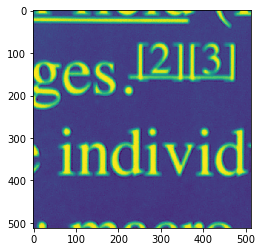

In [84]:
patch = patchExtraction('calibrate3/6_500_18129_s00_00000.jpg')
plt.imshow(patch)

In [85]:
discriminator.predict(patch[np.newaxis,:,:, np.newaxis]*255.0)[0]

array([ 0.01827756,  0.98172241], dtype=float32)

In [86]:
generator.predict(patch[np.newaxis,:,:, np.newaxis])[0]

array([ 0.63329828], dtype=float32)